# Race Review: Covid Petit Prix

This is a general page that will display info about a race day.

In [1]:
# These are libraries written for RaceAnalysis
from global_variables import G
from nbutils import display_markdown, display
import race_logs
import metadata as m
import process as p
import analysis as a
import chart as ch
import utils
import numpy as np

import nbutils

# Initialize for Seattle.
G.init_seattle(logging_level="INFO")

2020-10-28 20:34:58,072|INFO|read_metadata| Read 93 records.
2020-10-28 20:34:58,073|INFO|read_logs| Reading file 2020-10-24_10:32.pd.gz
2020-10-28 20:34:58,976|INFO|read_log_file| Session from 2020-10-24 17:32:48.070000, 163401 rows, 4.538611111111111 hours.
2020-10-28 20:35:00,414|INFO|read_logs| Found 163400 records before trim.
2020-10-28 20:35:00,431|INFO|read_logs| Trimming to 23536 124299


<IPython.core.display.Javascript object>


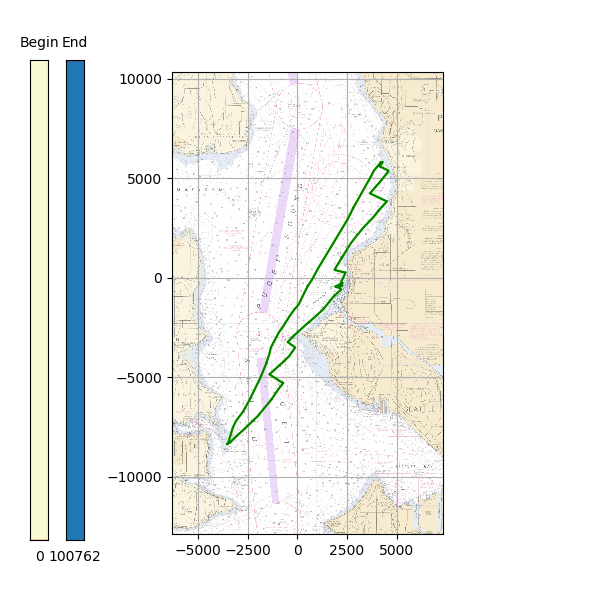

In [2]:
date = '2020-10-24'
df, race = race_logs.read_date(date) # race_trim=False)
chart = ch.trim_track(df)

In [3]:
if chart.is_trimmed:
    display("Updating Trim!")
    race_logs.trim_race(race, chart.begin, chart.end)

In [42]:
rudder, rrr = p.exponential_filter(np.array(df.rudder), 0.99, 10000)
# rudder = df.rudder
spd, rrr = p.exponential_filter(np.array(df.spd), 0.999, 2)
awa, rrr = p.exponential_filter_angle(np.array(df.awa), 0.999, 10)
df['vmg'] = np.cos(np.radians(df.twa)) * df.spd

<IPython.core.display.Javascript object>


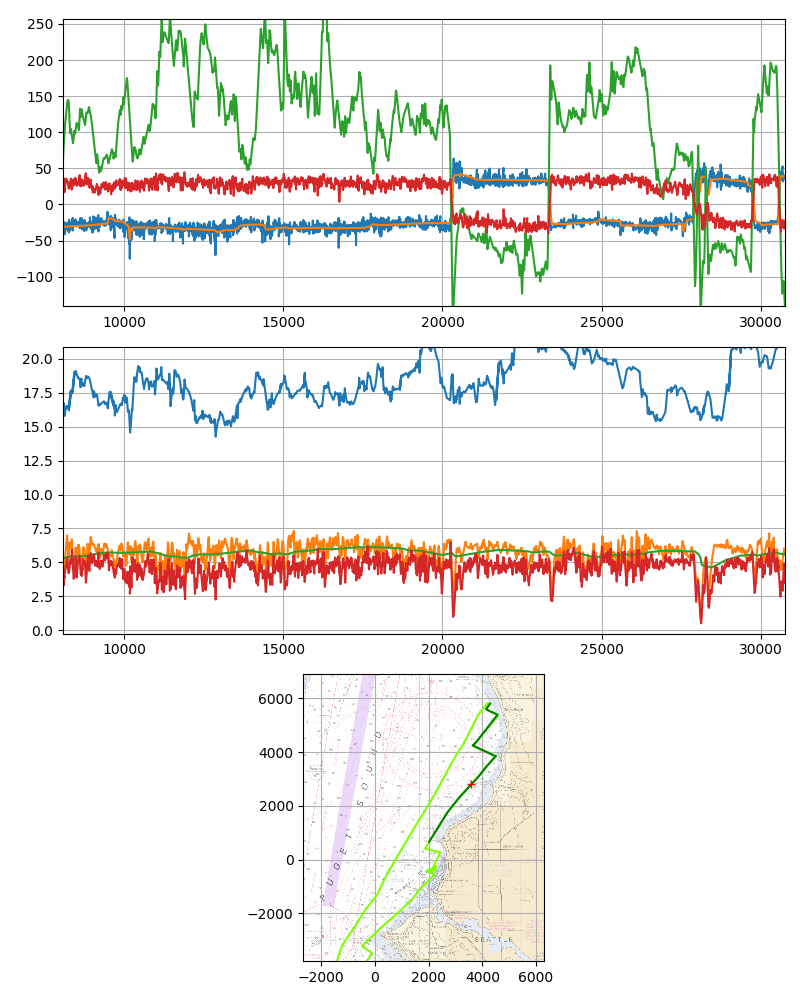

In [44]:
ccc = ch.chart_and_plot(df, None, (df.awa, awa, rudder*10, df.zg100_roll+3.5), (df.tws*1.944, df.spd*1.944, spd*1.944, df.vmg*1.944))

In [51]:
sdf = df.iloc[ccc.begin:ccc.end]
sdf.vmg.mean()*1.944, sdf.spd.mean()*1.944

(4.585717117607851, 5.710255784725303)

In [50]:
sdf.row_times

31390   2020-10-24 11:25:06.578263953-07:00
31391   2020-10-24 11:25:06.678281969-07:00
31392   2020-10-24 11:25:06.778299986-07:00
31393   2020-10-24 11:25:06.878318002-07:00
31394   2020-10-24 11:25:06.978336019-07:00
                        ...                
54080   2020-10-24 12:02:55.483210553-07:00
54081   2020-10-24 12:02:55.584229131-07:00
54082   2020-10-24 12:02:55.685247710-07:00
54083   2020-10-24 12:02:55.786266289-07:00
54084   2020-10-24 12:02:55.887284867-07:00
Name: row_times, Length: 22695, dtype: datetime64[ns, US/Pacific]

In [34]:
heel = sdf.zg100_roll+3.5
heel[heel > 0].mean()

29.662487708947886